In [10]:
# First attempts at getting a range-doppler map of collected hdf5 data

import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift # Might not need this
from radar_ffts import range_doppler_fft, range_doppler_sum

def range_doppler_map(hdf5_file_path, frame):
    
    frame_data = hdf5_file_path[f'Sensors/TI_Radar/Data/Frame_{frame}/frame_data'] # Collect the data of a specific frame, idk just fucking figure it out
    #print(frame_data[0,:,0]) # data is stored as samples x chirps x channels
    range_pad = 128
    doppler_pad = 64

    fftd_frame_data = range_doppler_fft(frame_data, range_pad, doppler_pad)

    plotted_fftd_frame_data = range_doppler_sum(fftd_frame_data)
    plt.figure()
    plt.imshow(plotted_fftd_frame_data, aspect='auto', cmap='jet')
    plt.title('Range-Doppler Map')
    plt.xlabel('Doppler')
    plt.ylabel('Range')
    plt.colorbar(label='Power (dB)')
    plt.show()

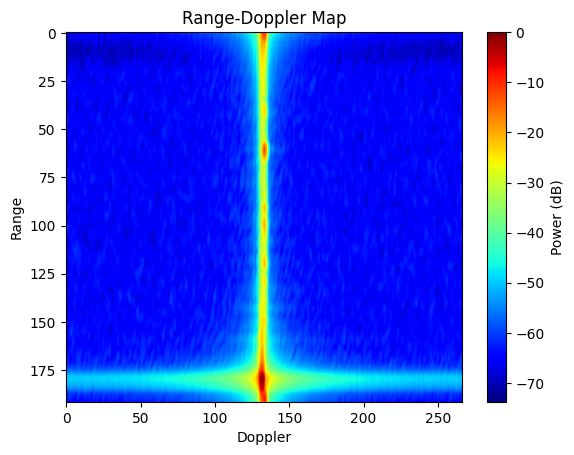

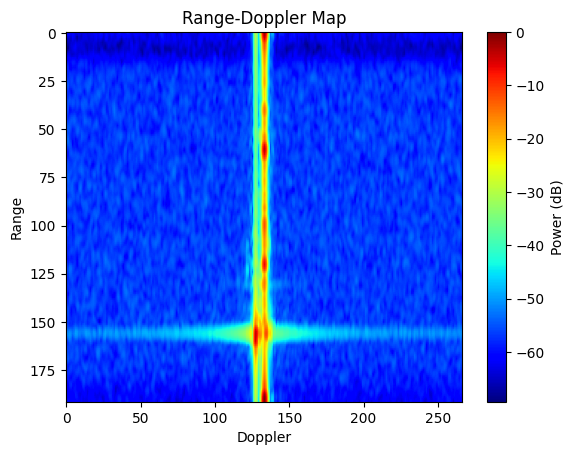

In [12]:
f = h5py.File('Experiment_moving_target_back_data.hdf5', 'r') # Read in the file
range_doppler_map(f, '1')
range_doppler_map(f, '125')